## Neural Network Regression with TensorFlow

## Typical architecture of a regresison neural network

The word *typical* is on purpose.

Why?

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputing some kind of target number.

Yes, the previous sentence is vague but we'll see this in action shortly.

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.

In [1]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

2.4.1


### Creating data to view and fit

Since we're working on a **regression problem** (predicting a number) let's create some linear data (a straight line) to model.

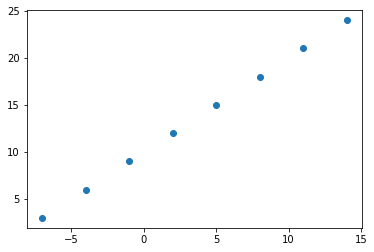

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

### Regression input shapes and output shapes

One of the most important concepts when working with neural networks are the input and output shapes.

The **input shape** is the shape of your data that goes into the model.

The **output shape** is the shape of your data you want to come out of your model.

In [3]:
# Example input and output shapes of a regresson model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [4]:
house_info.shape

TensorShape([3])

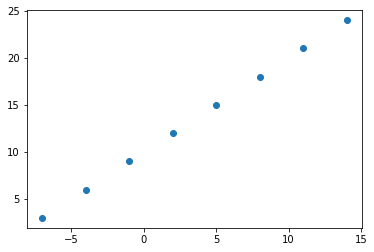

In [6]:
# Plotting Tensors
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

## Steps in modelling with TensorFlow

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer). 
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`). 

Let's see these in action using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to build a model for our regression data. And then we'll step through each.


In [16]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API with one layer
model1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model1.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model [ epochs : The no of times the learning algo runs to train the model]
model1.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 210ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 10.9748 - mae: 10.9748


#### What is an Epoch?
The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. An epoch is comprised of one or more batches. For example, as above, an epoch that has one batch is called the batch gradient descent learning algorithm.

You can think of a for-loop over the number of epochs where each loop proceeds over the training dataset. Within this for-loop is another nested for-loop that iterates over each batch of samples, where one batch has the specified “batch size” number of samples.

In [17]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
# Make a prediction with the model
model1.predict([17.0]) # the right answer is 27.0 (y = X + 10)

array([[12.716021]], dtype=float32)

## Improving a model

How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model**
    - Add more layers
    - Increase the number of hidden units (also called neurons) within each layer
    - Change the activation functions of each layer.
2. **Compiling a model** 
    - Choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** 
    - Fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [20]:
# Retraining with 80 epochs
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model2.fit(X, y, epochs=80) # train for 100 epochs not 10

Epoch 1/80
1/1 [==============================] - 0s 264ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/80
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/80
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/80
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/80
1/1 [==============================] - 0s 3ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/80
1/1 [==============================] - 0s 4ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/80
1/1 [==============================] - 0s 3ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/80
1/1 [==============================] - 0s 3ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/80
1/1 [==============================] - 0s 3ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/80
1/1 [==============================] - 0s 3ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/80
1/1 [==============================] - 0s 3ms/step - lo

In [21]:
# Remind ourselves of what X and y are
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [34]:
# Try and predict what y would be if X was 17.0
model2.predict([17.0]) # the right answer is 27.0 (y = X + 10)

array([[30.00851]], dtype=float32)

### Evaluating a model 

A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.


In [35]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [36]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

### Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:
* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our `X` and `y` arrays.

In [37]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing the data

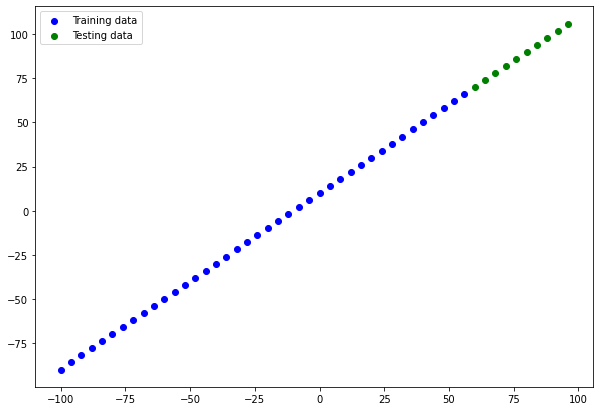

In [38]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [40]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model3 = tf.keras.Sequential([
  #tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
  tf.keras.Input(shape=(1))
])

# Compile model (same as above)
model3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
# model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)
# we haven't fit our built our model.We also haven't told it what input shape it should be expecting.
# Remember above, how we discussed the input shape was just one number?

In [41]:
model3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters.
* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [42]:
# Fit the model to the training data
model3.fit(X_train, y_train, epochs=80) # verbose controls how much gets output

Epoch 1/80
2/2 [==============================] - 0s 0s/step - loss: 10.0000 - mae: 10.0000
Epoch 2/80
2/2 [==============================] - 0s 3ms/step - loss: 10.0000 - mae: 10.0000
Epoch 3/80
2/2 [==============================] - 0s 3ms/step - loss: 10.0000 - mae: 10.0000
Epoch 4/80
2/2 [==============================] - 0s 2ms/step - loss: 10.0000 - mae: 10.0000
Epoch 5/80
2/2 [==============================] - 0s 3ms/step - loss: 10.0000 - mae: 10.0000
Epoch 6/80
2/2 [==============================] - 0s 2ms/step - loss: 10.0000 - mae: 10.0000
Epoch 7/80
2/2 [==============================] - 0s 3ms/step - loss: 10.0000 - mae: 10.0000
Epoch 8/80
2/2 [==============================] - 0s 3ms/step - loss: 10.0000 - mae: 10.0000
Epoch 9/80
2/2 [==============================] - 0s 3ms/step - loss: 10.0000 - mae: 10.0000
Epoch 10/80
2/2 [==============================] - 0s 3ms/step - loss: 10.0000 - mae: 10.0000
Epoch 11/80
2/2 [==============================] - 0s 2ms/step - loss:

In [43]:
# Check the model summary
model3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


### Visualizing the predictions

In [48]:
# Make predictions
y_preds = model3.predict(X_test)# View the predictions


In [49]:
# View the predictions
y_preds

array([[60.],
       [64.],
       [68.],
       [72.],
       [76.],
       [80.],
       [84.],
       [88.],
       [92.],
       [96.]], dtype=float32)

In [50]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

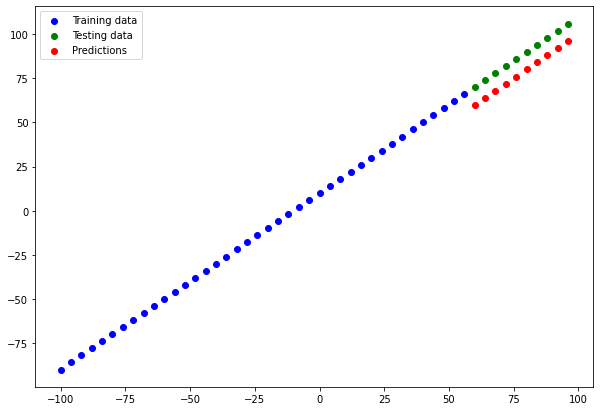

In [51]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

### Evaluating predictions

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics. 

Two of the main metrics used for regression problems are:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

**The lower each of these values, the better**.

In [55]:
# Evaluate the model on the test set
model3.evaluate(X_test, y_test)

1/1 [==============================] - 0s 55ms/step - loss: 10.0000 - mae: 10.0000


[10.0, 10.0]

In [56]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([28. , 24. , 20. , 16.4, 13.6, 11.6, 10.4, 10. , 10.4, 11.6],
      dtype=float32)>

That's strange, MAE should be a single output.

Instead, we get 10 values.

This is because our y_test and y_preds tensors are different shapes.

In [57]:
# Check the tensor shapes
y_test.shape, y_preds.shape

((10,), (10, 1))

In [59]:
# Shape after squeeze()
y_preds.squeeze().shape

(10,)

In [60]:
# What do they look like?
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([60., 64., 68., 72., 76., 80., 84., 88., 92., 96.], dtype=float32))

In [61]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

In [62]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=100.0>

In [63]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=10.0>

In [64]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

## Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:
1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:
1. `model_4` - same as original model_3, 1 layer, trained for 100 epochs.
2. `model_5` - 2 layers, trained for 100 epochs.
3. `model_6` - 2 layers, trained for 500 epochs.

**Build `model_4`**

In [65]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_4.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 16.4124 - mae: 16.4124
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0829 - mae: 11.0829
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1242 - mae: 11.1242
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 8.6945 - mae: 8.6945
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 9.8003 - mae: 9.8003
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.5263 - mae: 9.5263
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.4102 - mae: 8.4102
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.1449 - mae: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 19.4932 - mae: 19.4932
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 9.6061 - mae: 9.6061
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss:

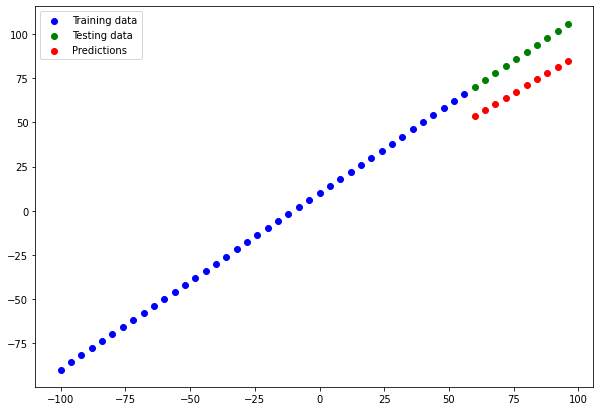

In [67]:
# Make and plot predictions for model_4
y_preds_4 = model_4.predict(X_test)
plot_predictions(predictions=y_preds_4)

In [68]:
# Calculate model_4 metrics
mae_4 = mae(y_test, y_preds_4.squeeze()).numpy()
mse_4 = mse(y_test, y_preds_4.squeeze()).numpy()
mae_4, mse_4

(18.745327, 353.5734)

**Build `model_5`**

This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.

In [70]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_5.fit(X_train, y_train, epochs=100, verbose=0) # set verbose to 0 for less output

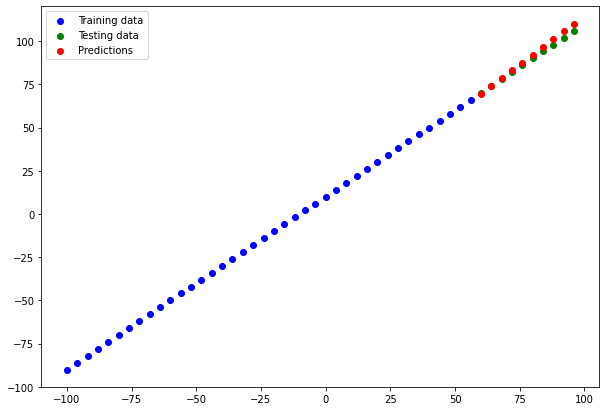

In [72]:
# Make and plot predictions for model_5
y_preds_5 = model_5.predict(X_test)
plot_predictions(predictions=y_preds_5)

In [74]:
# Calculate model_5 metrics
mae_5 = mae(y_test, y_preds_5.squeeze()).numpy()
mse_5 = mse(y_test, y_preds_5.squeeze()).numpy()
mae_5, mse_5

(1.9098641, 5.4595404)

With the addition of an extra layer Model 5 is much improved.

**Build `model_6`**

For our next model, we'll keep everything the same as `model_5` except this time we'll train for longer (500 epochs instead of 100).

This will give our model more of a chance to learn the patterns in the data.

In [76]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_5
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_6.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_6.fit(X_train, y_train, epochs=500, verbose=0) # set verbose to 0 for less output

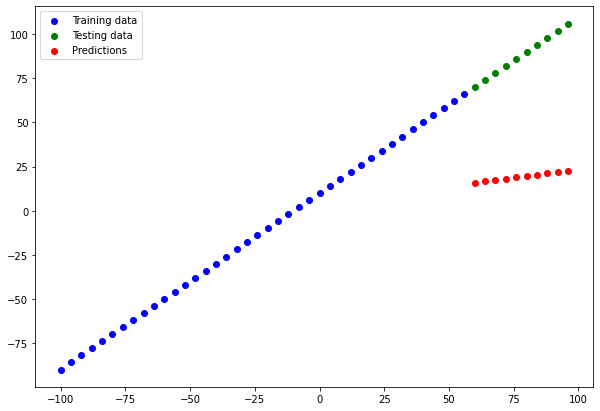

In [78]:
# Make and plot predictions for model_6
y_preds_6 = model_6.predict(X_test)
plot_predictions(predictions=y_preds_6)

#### OVERFITTING CASE
As it turns out, our model might've trained too long and has thus resulted in worse results (we'll see ways to prevent training for too long later on).

In [79]:
# Calculate model_3 metrics
mae_6 = mae(y_test, y_preds_6.squeeze()).numpy()
mse_6 = mse(y_test, y_preds_6.squeeze()).numpy()
mae_6, mse_6

(68.687874, 4804.4736)

### Comparing results

In [80]:
model_results = [["model_4", mae_4, mse_4],
                 ["model_5", mae_5, mse_5],
                 ["model_6", mae_6, mae_6]]

In [81]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_4,18.745327,353.573395
1,model_5,1.909864,5.459540
2,model_6,68.687874,68.687874


### Saving a model

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [83]:
# Save a model using the SavedModel format
model_5.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [84]:
# Save a model using the HDF5 format
model_5.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

## Loading a model

We can load a saved model using the [`load_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model) method.


In [85]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [87]:
# Compare model_5 with the SavedModel version (should return True)
model_5_preds = model_5.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_5_preds.squeeze()).numpy()

True

In [89]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


## A larger example

Alright, we've seen the fundamentals of building neural network regression models in TensorFlow.

Let's step it up a notch and build a model for a more feature rich datase.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, `age`, `sex`, `bmi`, `children`, `smoking_status` and `residential_region`.

To do, we'll leverage the pubically available [Medical Cost dataset](https://www.kaggle.com/mirichoi0218/insurance) available from Kaggle and [hosted on GitHub](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv).


In [126]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [128]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [129]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [148]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [149]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


### Taking care of Dummy Variable Trap

In [150]:
X = insurance_one_hot.drop("sex_male", axis=1)

In [151]:
X = X.drop("region_southwest", axis=1)

In [152]:
X = X.drop("smoker_yes", axis=1)

In [153]:
# View features
X.head()

,age,bmi,children,charges,sex_female,smoker_no,region_northeast,region_northwest,region_southeast
0,19,27.900,0,16884.92400,1,0,0,0,0
1,18,33.770,1,1725.55230,0,1,0,0,1
2,28,33.000,3,4449.46200,0,1,0,0,1
3,33,22.705,0,21984.47061,0,1,0,1,0
4,32,28.880,0,3866.85520,0,1,0,1,0


In [154]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits

In [104]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_5)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

In [106]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: nan - mae: nan


[nan, nan]

Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:
- Increasing the number of layers (2 -> 3).
- Increasing the number of units in each layer (except for the output layer).
- Changing the optimizer (from SGD to Adam).

Everything else will stay the same.

In [111]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=150, verbose=0)

In [112]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 2.0253 - mae: 2.0253


[2.025254011154175, 2.025254011154175]

#### Retrain and Find your desired epochs (Avoid Overfitting)
- **150 epochs**: **loss**: 2.0253 - **mae**: 2.0253
- **200 epochs**: **loss**: 222.733 - **mae**: 232.162

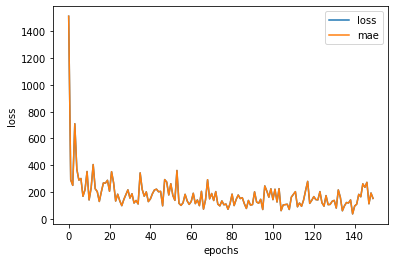

In [114]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

From this, it looks like our model's loss (and MAE) were both still decreasing (in our case, MAE and loss are the same, hence the lines in the plot overlap eachother).

What this tells us is the loss might go down if we try training it for longer. (But not much Longer)

In [115]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 63.3686 - mae: 63.3686
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 120.5667 - mae: 120.5667
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 165.4513 - mae: 165.4513
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 97.2614 - mae: 97.2614
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 126.6915 - mae: 126.6915
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 171.4222 - mae: 171.4222
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 261.5819 - mae: 261.5819
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 125.0959 - mae: 125.0959
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 111.4504 - mae: 111.4504
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 133.3827 - mae: 133.3827
Epoch 11/100
34/34 [===

In [116]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 2ms/step - loss: 144.5170 - mae: 144.5170


(144.5170440673828, 144.5170440673828)

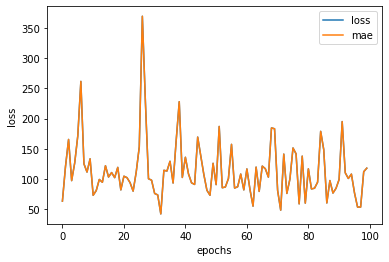

In [117]:
# Plot the model trained for 250 (150 + 100) total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

### Preprocessing data (normalization and standardization)

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called **normalization** (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call **standardization** which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

In [136]:
X.head()

,age,bmi,children,charges,sex_female,smoker_no,region_northeast,region_northwest,region_southeast
0,19,27.900,0,16884.92400,1,0,0,0,0
1,18,33.770,1,1725.55230,0,1,0,0,1
2,28,33.000,3,4449.46200,0,1,0,0,1
3,33,22.705,0,21984.47061,0,1,0,1,0
4,32,28.880,0,3866.85520,0,1,0,1,0


In [156]:
X_train.loc[0]

age                    19.000
bmi                    27.900
children                0.000
charges             16884.924
sex_female              1.000
smoker_no               0.000
region_northeast        0.000
region_northwest        0.000
region_southeast        0.000
Name: 0, dtype: float64

In [157]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_normal = sc.fit_transform(X_train)
X_test_normal = sc.transform(X_test)

In [158]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 9), (1070, 9))

In [159]:
X_train_normal[0]

array([ 0.47222651, -1.75652513,  0.73433626, -0.3456208 ,  1.0246016 ,
        0.50874702, -0.57663083,  1.78316783, -0.59966106])

Our data is normalized and numerical, let's model it.

We'll use the same model as `insurance_model_2`.

In [160]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0) 

In [161]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 5.3058 - mae: 5.3058


In [162]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

(144.5170440673828, 5.305846214294434)

This is **one of the main benefits of normalization: faster convergence time** (a fancy way of saying, your model gets to better results faster).

`insurance_model_2` may have eventually achieved the same results as `insurance_model_3` if we left it training for longer. 

Also, the results may change if we were to alter the architectures of the models, e.g. more hidden units per layer or more layers.

But since our main goal as neural network practioners is to decrease the time between experiments, anything that helps us get better results sooner is a plus.